- 본 코드에서는 Normalization이 수행하는 역할과 패턴을 분석합니다
- 해당 실험은 LayerNorm 외 다른 Method(BatchNorm)에서도 'Transformer without Normalization'과 같이 S-shaped 관계가 나오는지 확인하고자 합니다

1. BatchNormalization의 input과 output을 시각화합니다
    - 실험결과: s-shape보다는 relu에 가까운 형상을 보인다
2. 논문과 똑같이, LayerNorm의 input과 output을 시각화합니다
    - 결과: s-shape 형상을 확인가능하다

## BatchNorm

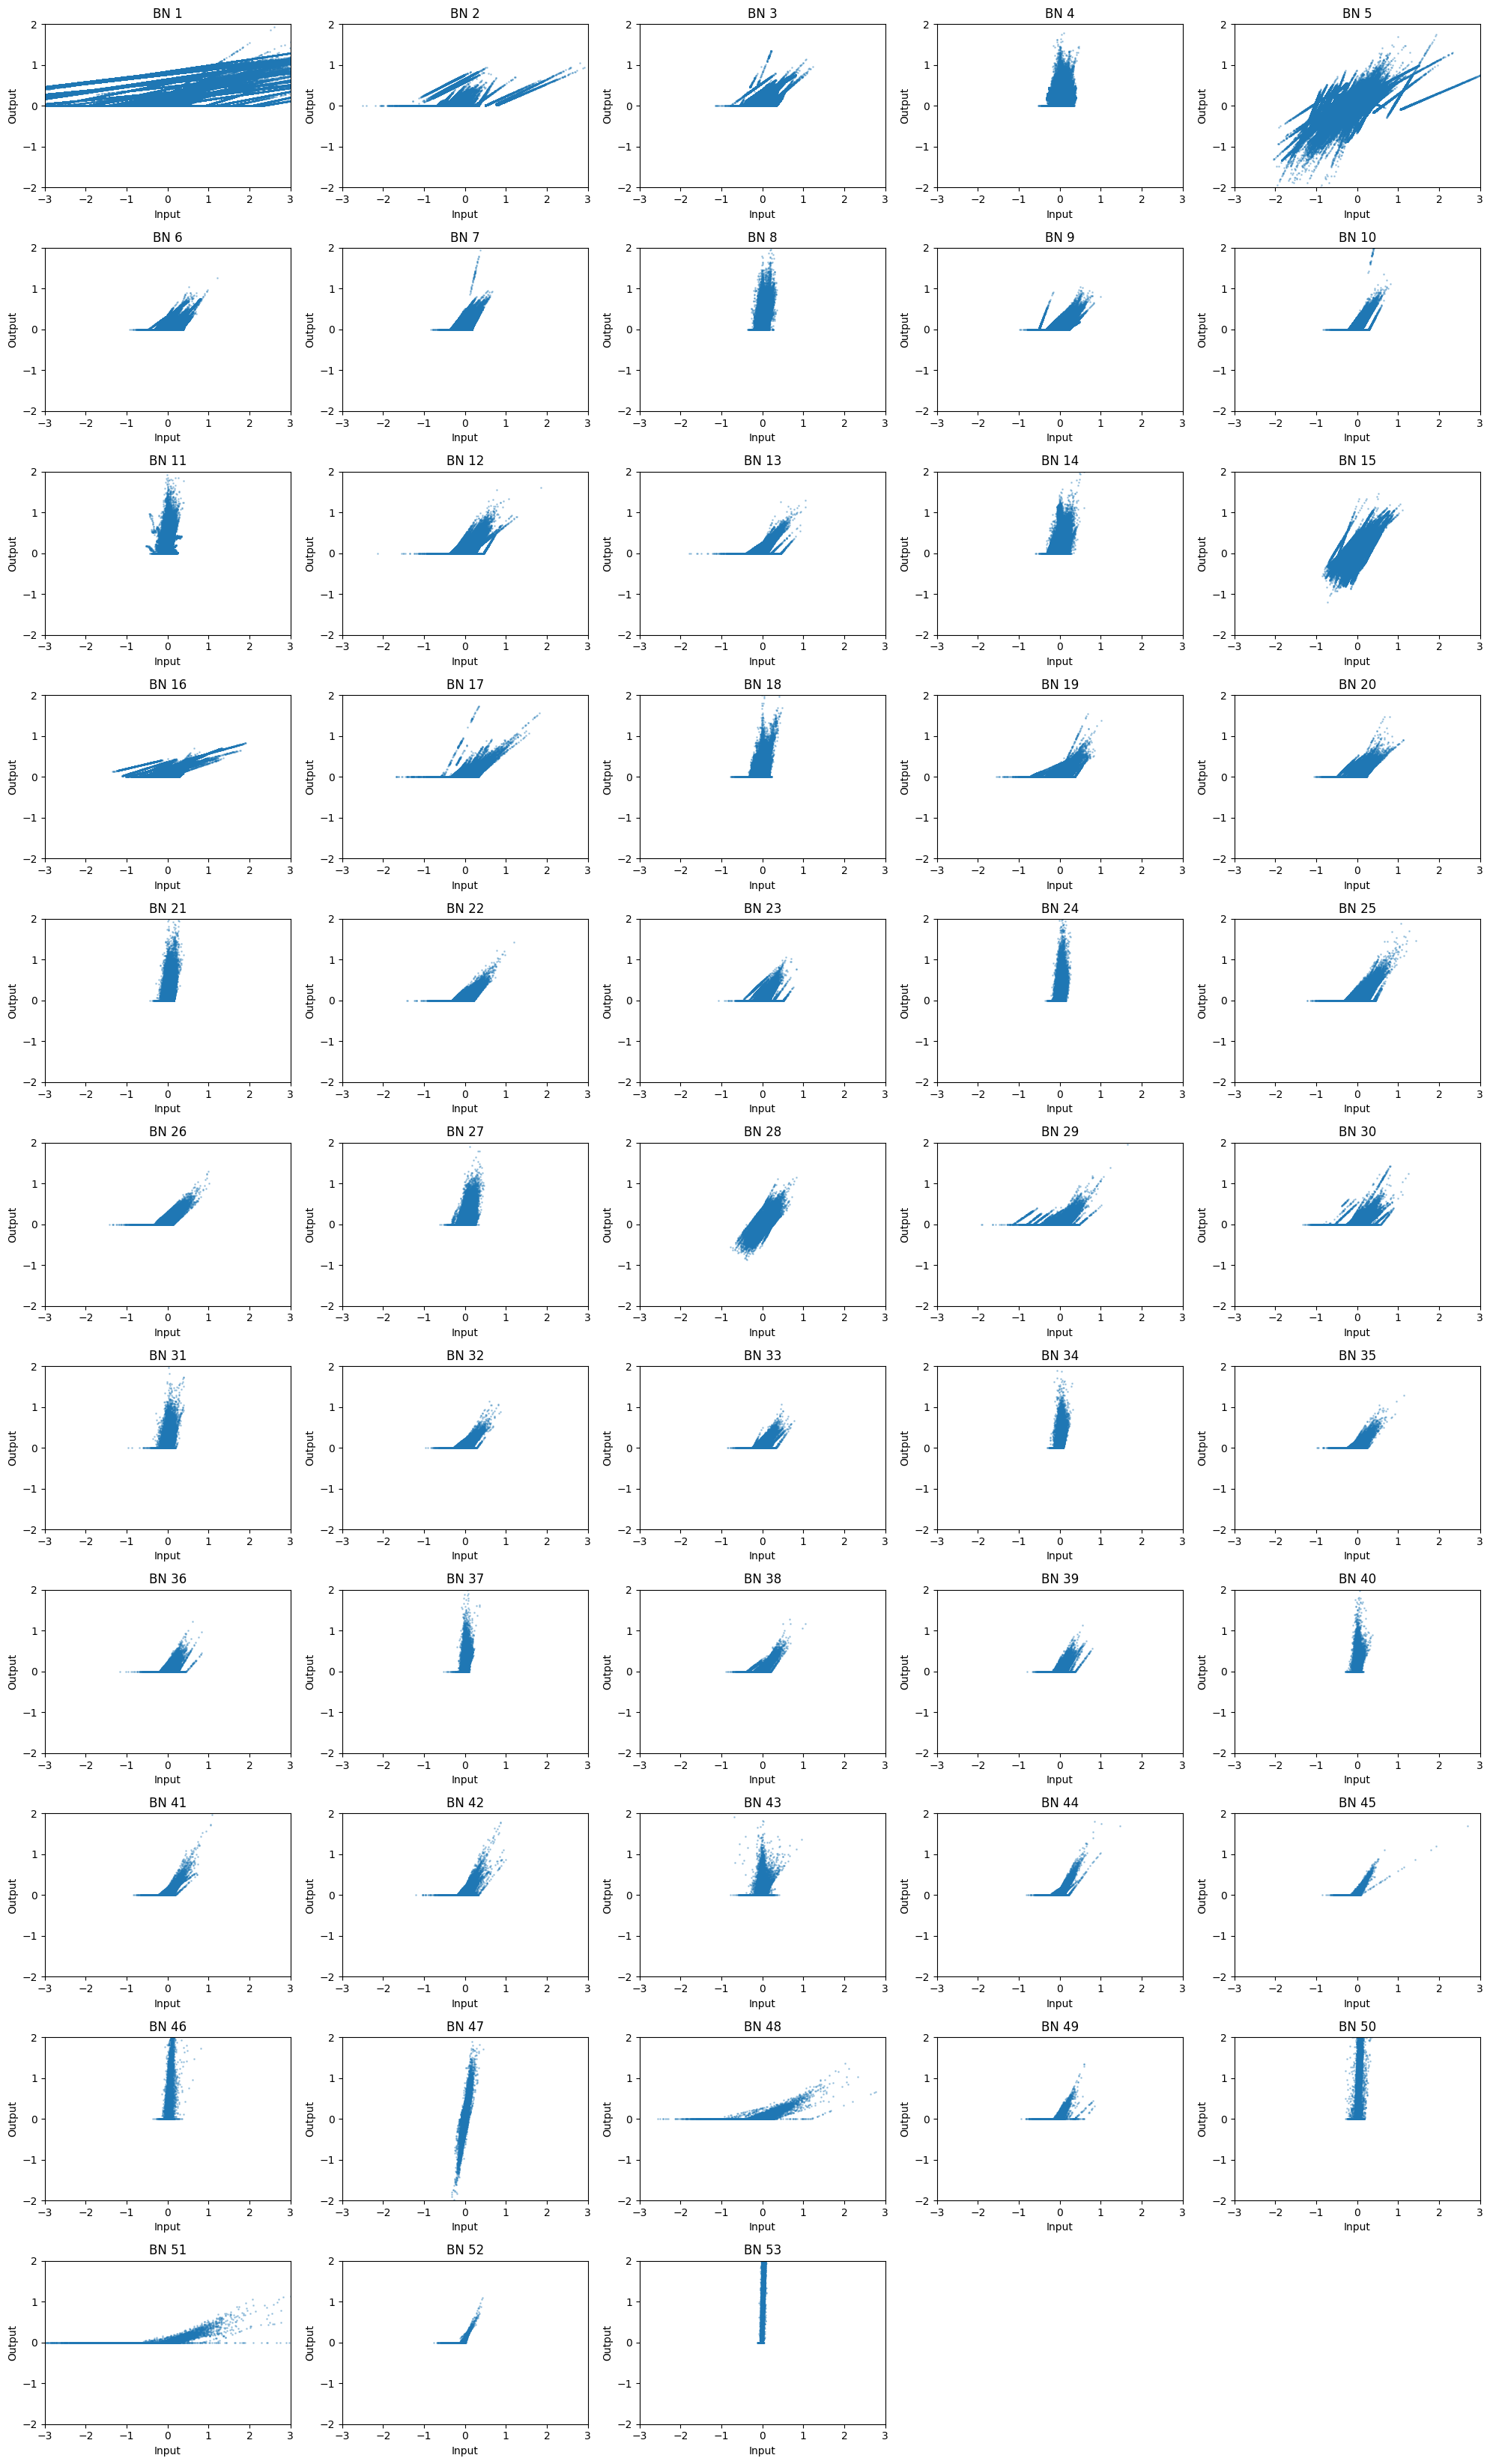

In [52]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from datasets import load_dataset
import matplotlib.pyplot as plt
from PIL import Image
import math

# BN 입출력 저장 dict
bn_io_storage = {}

def hook_fn(module, input, output):
    bn_io_storage[module] = {
        "input": input[0].detach().cpu().flatten().numpy(),
        "output": output.detach().cpu().flatten().numpy()
    }

# 모델 로딩 및 hook 등록
def load_model_with_hooks():
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    model.eval()
    for module in model.modules():
        if isinstance(module, nn.BatchNorm2d):
            module.register_forward_hook(hook_fn)
    return model

# transform 정의
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# mini-ImageNet 데이터셋에서 1장만 사용
dataset = load_dataset("timm/mini-imagenet", split="validation[:50]")
img = dataset[0]['image'].convert("RGB")
img = transform(img).unsqueeze(0)  # 배치 차원 추가

# 모델 로딩 및 forward
model = load_model_with_hooks()
with torch.no_grad():
    _ = model(img)

# 시각화
total_bn_layers = len(bn_io_storage)
cols = 5
rows = math.ceil(total_bn_layers / cols)

plt.figure(figsize=(cols * 4, rows * 3))
for i, (layer, values) in enumerate(bn_io_storage.items()):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(values['input'], values['output'], s=1, alpha=0.3)
    plt.xlim(-3, 3)
    plt.ylim(-2, 2)
    plt.title(f"BN {i+1}")
    plt.xlabel("Input")
    plt.ylabel("Output")

plt.tight_layout()
plt.show()



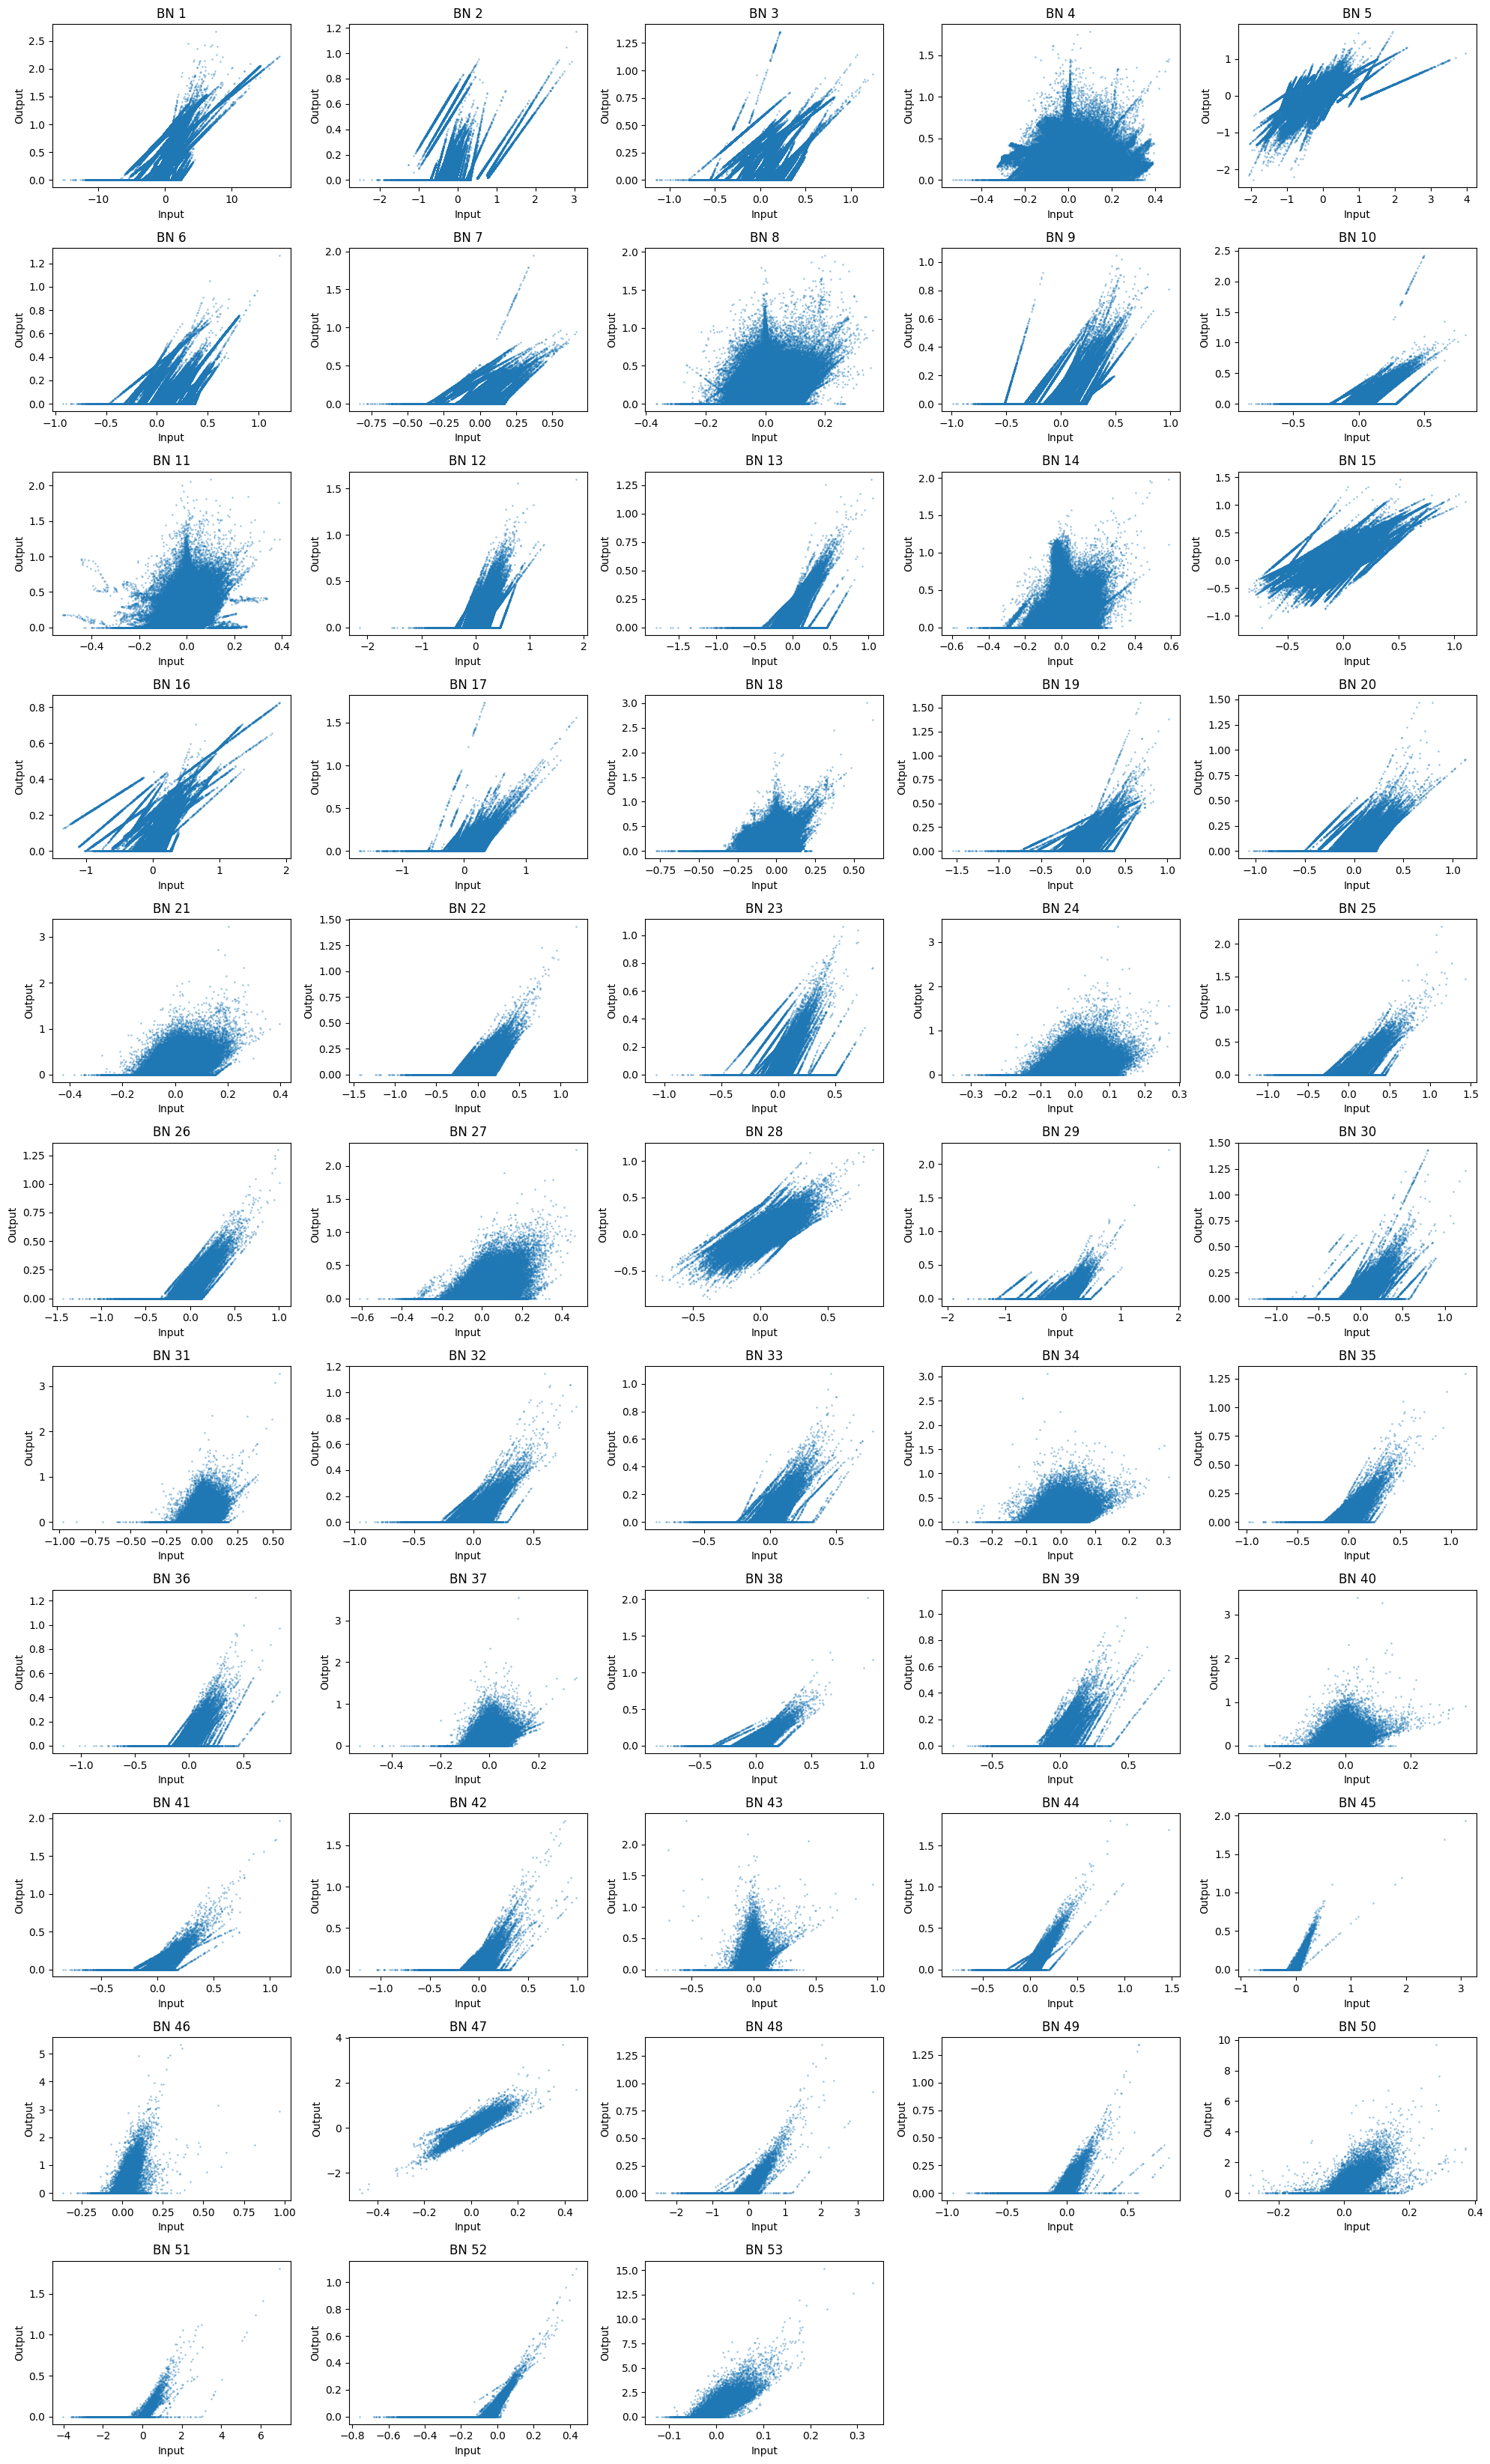

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from datasets import load_dataset
import matplotlib.pyplot as plt
from PIL import Image
import math


# BN 입출력 저장 dict
bn_io_storage = {}

def hook_fn(module, input, output):
    bn_io_storage[module] = {
        "input": input[0].detach().cpu().flatten().numpy(),
        "output": output.detach().cpu().flatten().numpy()
    }

# 모델 로딩 및 hook 등록
def load_model_with_hooks():
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    model.eval()
    for module in model.modules():
        if isinstance(module, nn.BatchNorm2d):
            module.register_forward_hook(hook_fn)
    return model

# transform 정의
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# mini-ImageNet 데이터셋에서 1장만 사용
dataset = load_dataset("timm/mini-imagenet", split="validation[:50]")
img = dataset[0]['image'].convert("RGB")
img = transform(img).unsqueeze(0)  # 배치 차원 추가

# 모델 로딩 및 forward
model = load_model_with_hooks()
with torch.no_grad():
    _ = model(img)

# 시각화
total_bn_layers = len(bn_io_storage)
cols = 5
rows = math.ceil(total_bn_layers / cols)

plt.figure(figsize=(cols * 4, rows * 3))
for i, (layer, values) in enumerate(bn_io_storage.items()):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(values['input'], values['output'], s=1, alpha=0.3)
    plt.title(f"BN {i+1}")
    plt.xlabel("Input")
    plt.ylabel("Output")

plt.tight_layout()
plt.show()


/tmp/ipykernel_866739/1222975616.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", 10)  # 최대 10개 색상 지원


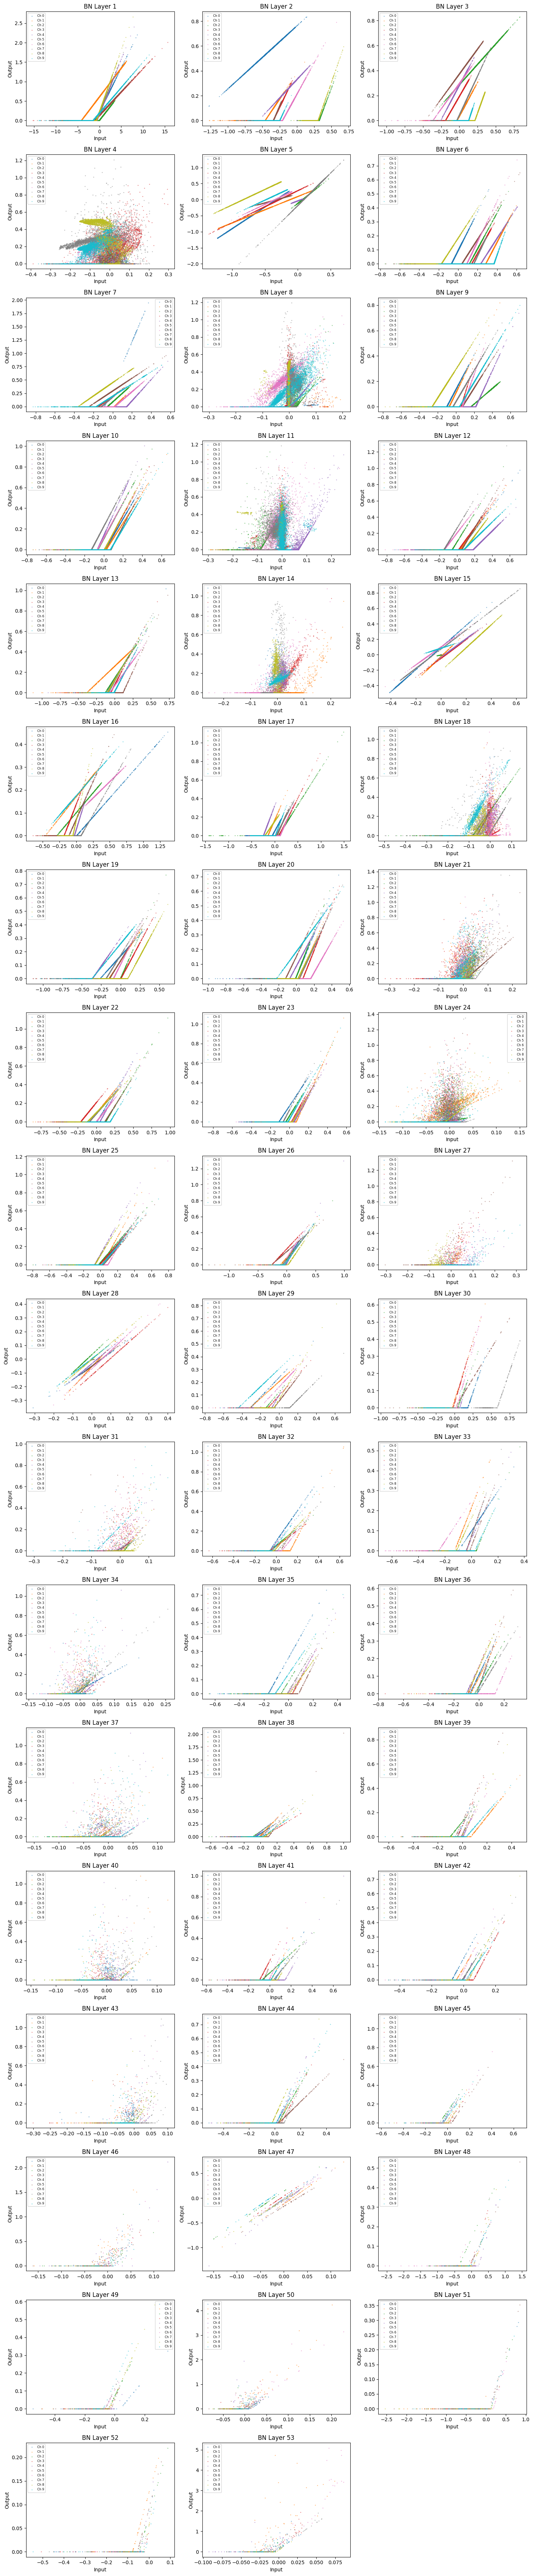

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from datasets import load_dataset
import matplotlib.pyplot as plt
import math
import numpy as np
from PIL import Image

# BN 입출력 저장 dict
bn_io_storage = {}

def hook_fn(module, input, output):
    # input/output shape: (B, C, H, W)
    x = input[0].detach().cpu()
    y = output.detach().cpu()

    bn_io_storage[module] = {
        "input": x,
        "output": y
    }

# 모델 로딩 및 hook 등록
def load_model_with_hooks():
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    model.eval()
    for module in model.modules():
        if isinstance(module, nn.BatchNorm2d):
            module.register_forward_hook(hook_fn)
    return model

# transform 정의
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# mini-ImageNet 데이터셋에서 1장만 사용
dataset = load_dataset("timm/mini-imagenet", split="validation[:1]")
img = dataset[0]['image'].convert("RGB")
img = transform(img).unsqueeze(0)  # (1, 3, 224, 224)

# 모델 로딩 및 forward
model = load_model_with_hooks()
with torch.no_grad():
    _ = model(img)

# 시각화
total_bn_layers = len(bn_io_storage)
cols = 3
rows = math.ceil(total_bn_layers / cols)
colors = plt.cm.get_cmap("tab10", 10)  # 최대 10개 색상 지원

plt.figure(figsize=(cols * 5, rows * 4))

for i, (layer, tensors) in enumerate(bn_io_storage.items()):
    x = tensors['input'][0]    # shape: (C, H, W)
    y = tensors['output'][0]   # shape: (C, H, W)

    plt.subplot(rows, cols, i + 1)
    C = x.shape[0]
    for c in range(min(C, 10)):  # 너무 많으면 최대 10채널만 표시
        x_c = x[c].flatten().numpy()
        y_c = y[c].flatten().numpy()
        plt.scatter(x_c, y_c, s=1, alpha=0.4, color=colors(c), label=f"Ch {c}")

    plt.title(f"BN Layer {i+1}")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend(fontsize=6)

plt.tight_layout()
plt.show()


/tmp/ipykernel_866739/2919490682.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("nipy_spectral", 30)  # 더 다양한 색상 지원


[BN Layer 1] Input min: -15.235, max: 17.224 | Output min: 0.000, max: 2.665
[BN Layer 2] Input min: -2.509, max: 3.044 | Output min: 0.000, max: 1.170
[BN Layer 3] Input min: -1.146, max: 1.240 | Output min: 0.000, max: 1.354
[BN Layer 4] Input min: -0.534, max: 0.463 | Output min: 0.000, max: 1.784
[BN Layer 5] Input min: -2.057, max: 3.964 | Output min: -2.290, max: 1.740
[BN Layer 6] Input min: -0.920, max: 1.206 | Output min: 0.000, max: 1.269
[BN Layer 7] Input min: -0.830, max: 0.663 | Output min: 0.000, max: 1.948
[BN Layer 8] Input min: -0.365, max: 0.359 | Output min: 0.000, max: 1.955
[BN Layer 9] Input min: -0.990, max: 0.987 | Output min: 0.000, max: 1.048
[BN Layer 10] Input min: -0.836, max: 0.812 | Output min: 0.000, max: 2.426
[BN Layer 11] Input min: -0.520, max: 0.392 | Output min: 0.000, max: 2.094
[BN Layer 12] Input min: -2.141, max: 1.862 | Output min: 0.000, max: 1.605
[BN Layer 13] Input min: -1.796, max: 1.056 | Output min: 0.000, max: 1.304
[BN Layer 14] Inpu

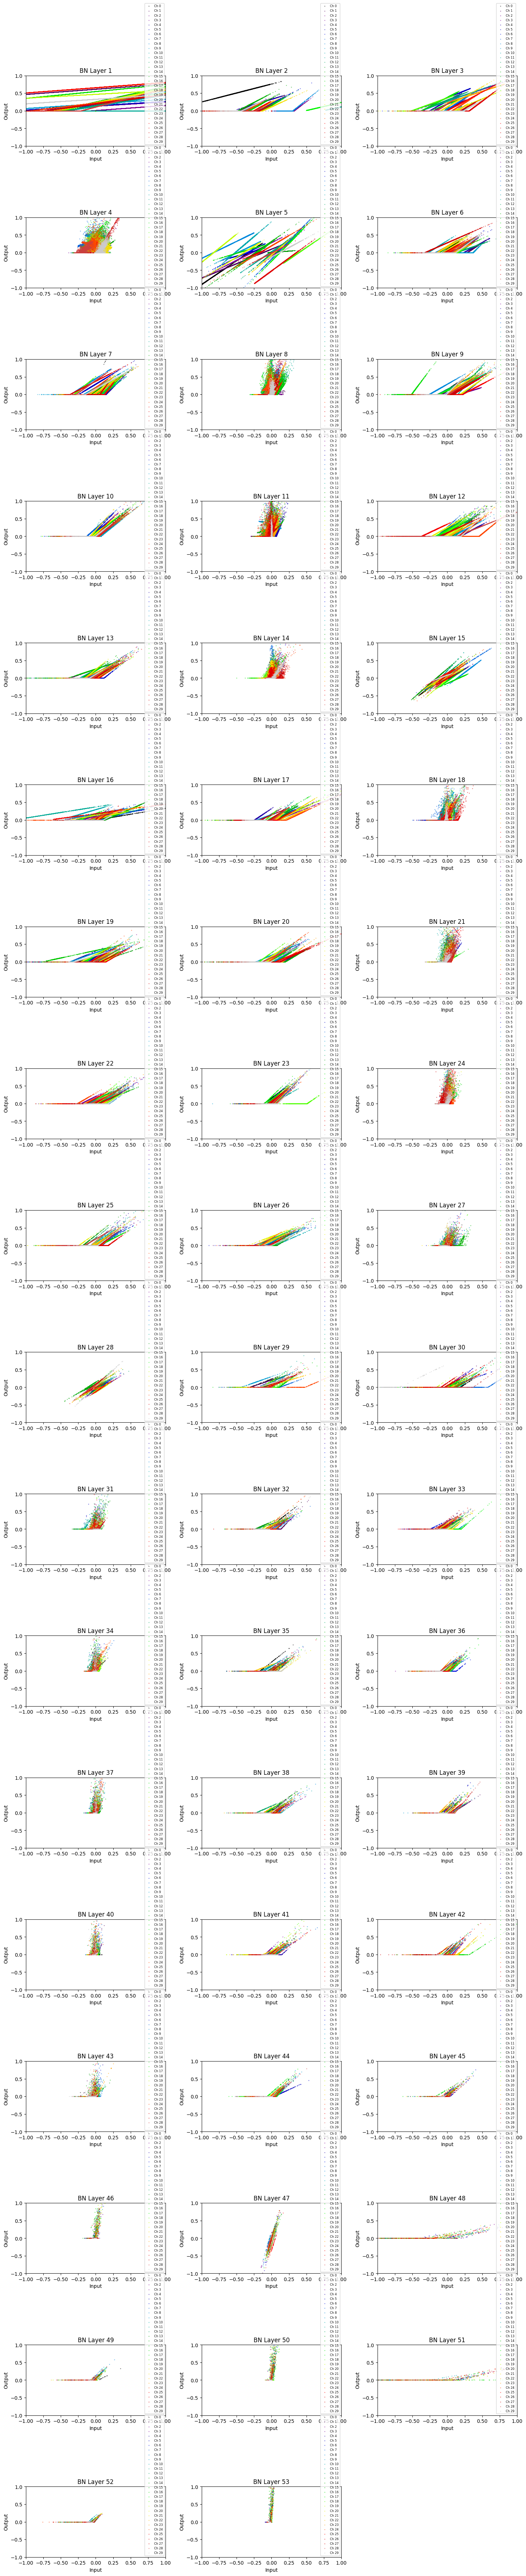

In [35]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from datasets import load_dataset
import matplotlib.pyplot as plt
import math
import numpy as np
from PIL import Image

# BN 입출력 저장 dict
bn_io_storage = {}

def hook_fn(module, input, output):
    # input/output shape: (B, C, H, W)
    x = input[0].detach().cpu()
    y = output.detach().cpu()
    bn_io_storage[module] = {
        "input": x,
        "output": y
    }

# 모델 로딩 및 hook 등록
def load_model_with_hooks():
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    model.eval()
    for module in model.modules():
        if isinstance(module, nn.BatchNorm2d):
            module.register_forward_hook(hook_fn)
    return model

# transform 정의
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# mini-ImageNet 데이터셋에서 1장만 사용
dataset = load_dataset("timm/mini-imagenet", split="validation[:10]")
img = dataset[0]['image'].convert("RGB")
img = transform(img).unsqueeze(0)  # (1, 3, 224, 224)

# 모델 로딩 및 forward
model = load_model_with_hooks()
with torch.no_grad():
    _ = model(img)

# 시각화
total_bn_layers = len(bn_io_storage)
cols = 3
rows = math.ceil(total_bn_layers / cols)
colors = plt.cm.get_cmap("nipy_spectral", 30)  # 더 다양한 색상 지원

plt.figure(figsize=(cols * 5, rows * 4))

for i, (layer, tensors) in enumerate(bn_io_storage.items()):
    x = tensors['input'][0]    # shape: (C, H, W)
    y = tensors['output'][0]   # shape: (C, H, W)

    # Min/Max 출력값 확인
    print(f"[BN Layer {i+1}] Input min: {x.min():.3f}, max: {x.max():.3f} | Output min: {y.min():.3f}, max: {y.max():.3f}")

    plt.subplot(rows, cols, i + 1)
    C = x.shape[0]
    for c in range(min(C, 30)):
        x_c = x[c].flatten().numpy()
        y_c = y[c].flatten().numpy()
        plt.scatter(x_c, y_c, s=1, alpha=0.4, color=colors(c), label=f"Ch {c}")
    
    plt.title(f"BN Layer {i+1}")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.legend(fontsize=6, loc='lower right')

plt.tight_layout()
plt.show()


## Layer Norm

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

/tmp/ipykernel_866739/1069022452.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", 10)


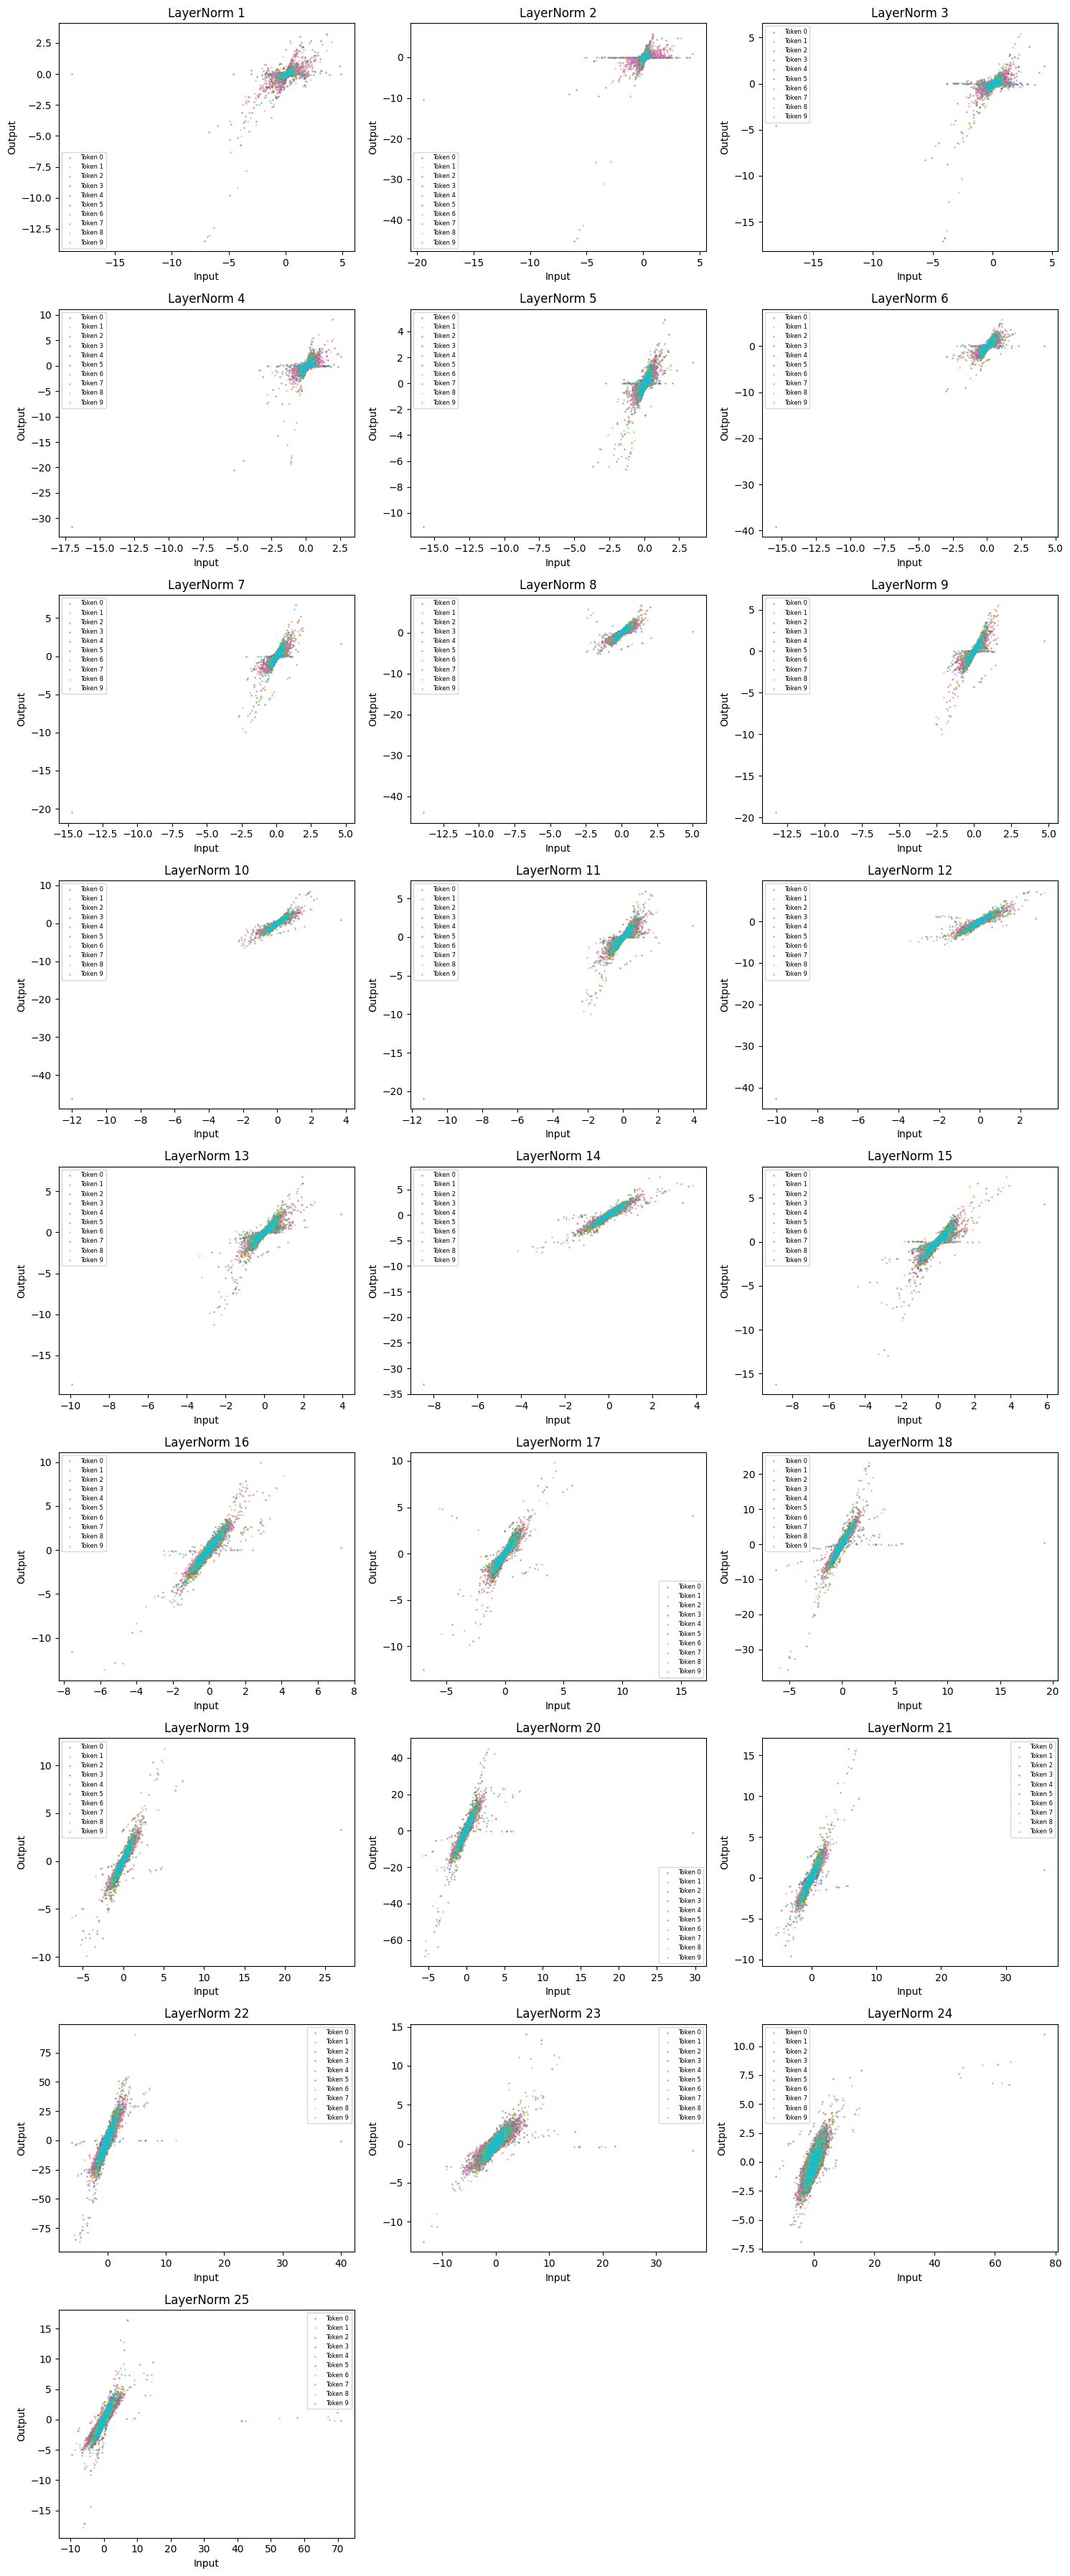

In [36]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math
import numpy as np
from datasets import load_dataset
import timm
from PIL import Image

# LayerNorm 입출력 저장 dict
ln_io_storage = {}

def ln_hook_fn(module, input, output):
    # input/output shape: (B, N, D)
    x = input[0].detach().cpu()
    y = output.detach().cpu()
    ln_io_storage[module] = {
        "input": x,
        "output": y
    }

# ViT 모델 로딩 및 hook 등록
def load_vit_with_ln_hooks():
    model = timm.create_model('vit_base_patch16_224', pretrained=True)
    model.eval()
    for module in model.modules():
        if isinstance(module, nn.LayerNorm):
            module.register_forward_hook(ln_hook_fn)
    return model

# transform 정의
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# mini-ImageNet 데이터셋에서 1장만 사용
dataset = load_dataset("timm/mini-imagenet", split="validation[:1]")
img = dataset[0]['image'].convert("RGB")
img = transform(img).unsqueeze(0)  # (1, 3, 224, 224)

# 모델 로딩 및 forward
model = load_vit_with_ln_hooks()
with torch.no_grad():
    _ = model(img)

# 시각화
total_ln_layers = len(ln_io_storage)
cols = 3
rows = math.ceil(total_ln_layers / cols)
colors = plt.cm.get_cmap("tab10", 10)

plt.figure(figsize=(cols * 5, rows * 4))

for i, (layer, tensors) in enumerate(ln_io_storage.items()):
    x = tensors['input'][0]    # shape: (N, D)
    y = tensors['output'][0]   # shape: (N, D)
    N = x.shape[0]
    
    plt.subplot(rows, cols, i + 1)
    for n in range(min(N, 10)):  # 최대 10 토큰만 시각화
        x_n = x[n].flatten().numpy()
        y_n = y[n].flatten().numpy()
        plt.scatter(x_n, y_n, s=1, alpha=0.4, color=colors(n), label=f"Token {n}")

    plt.title(f"LayerNorm {i+1}")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend(fontsize=6)

plt.tight_layout()
plt.show()


/tmp/ipykernel_866739/249623326.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", 10)


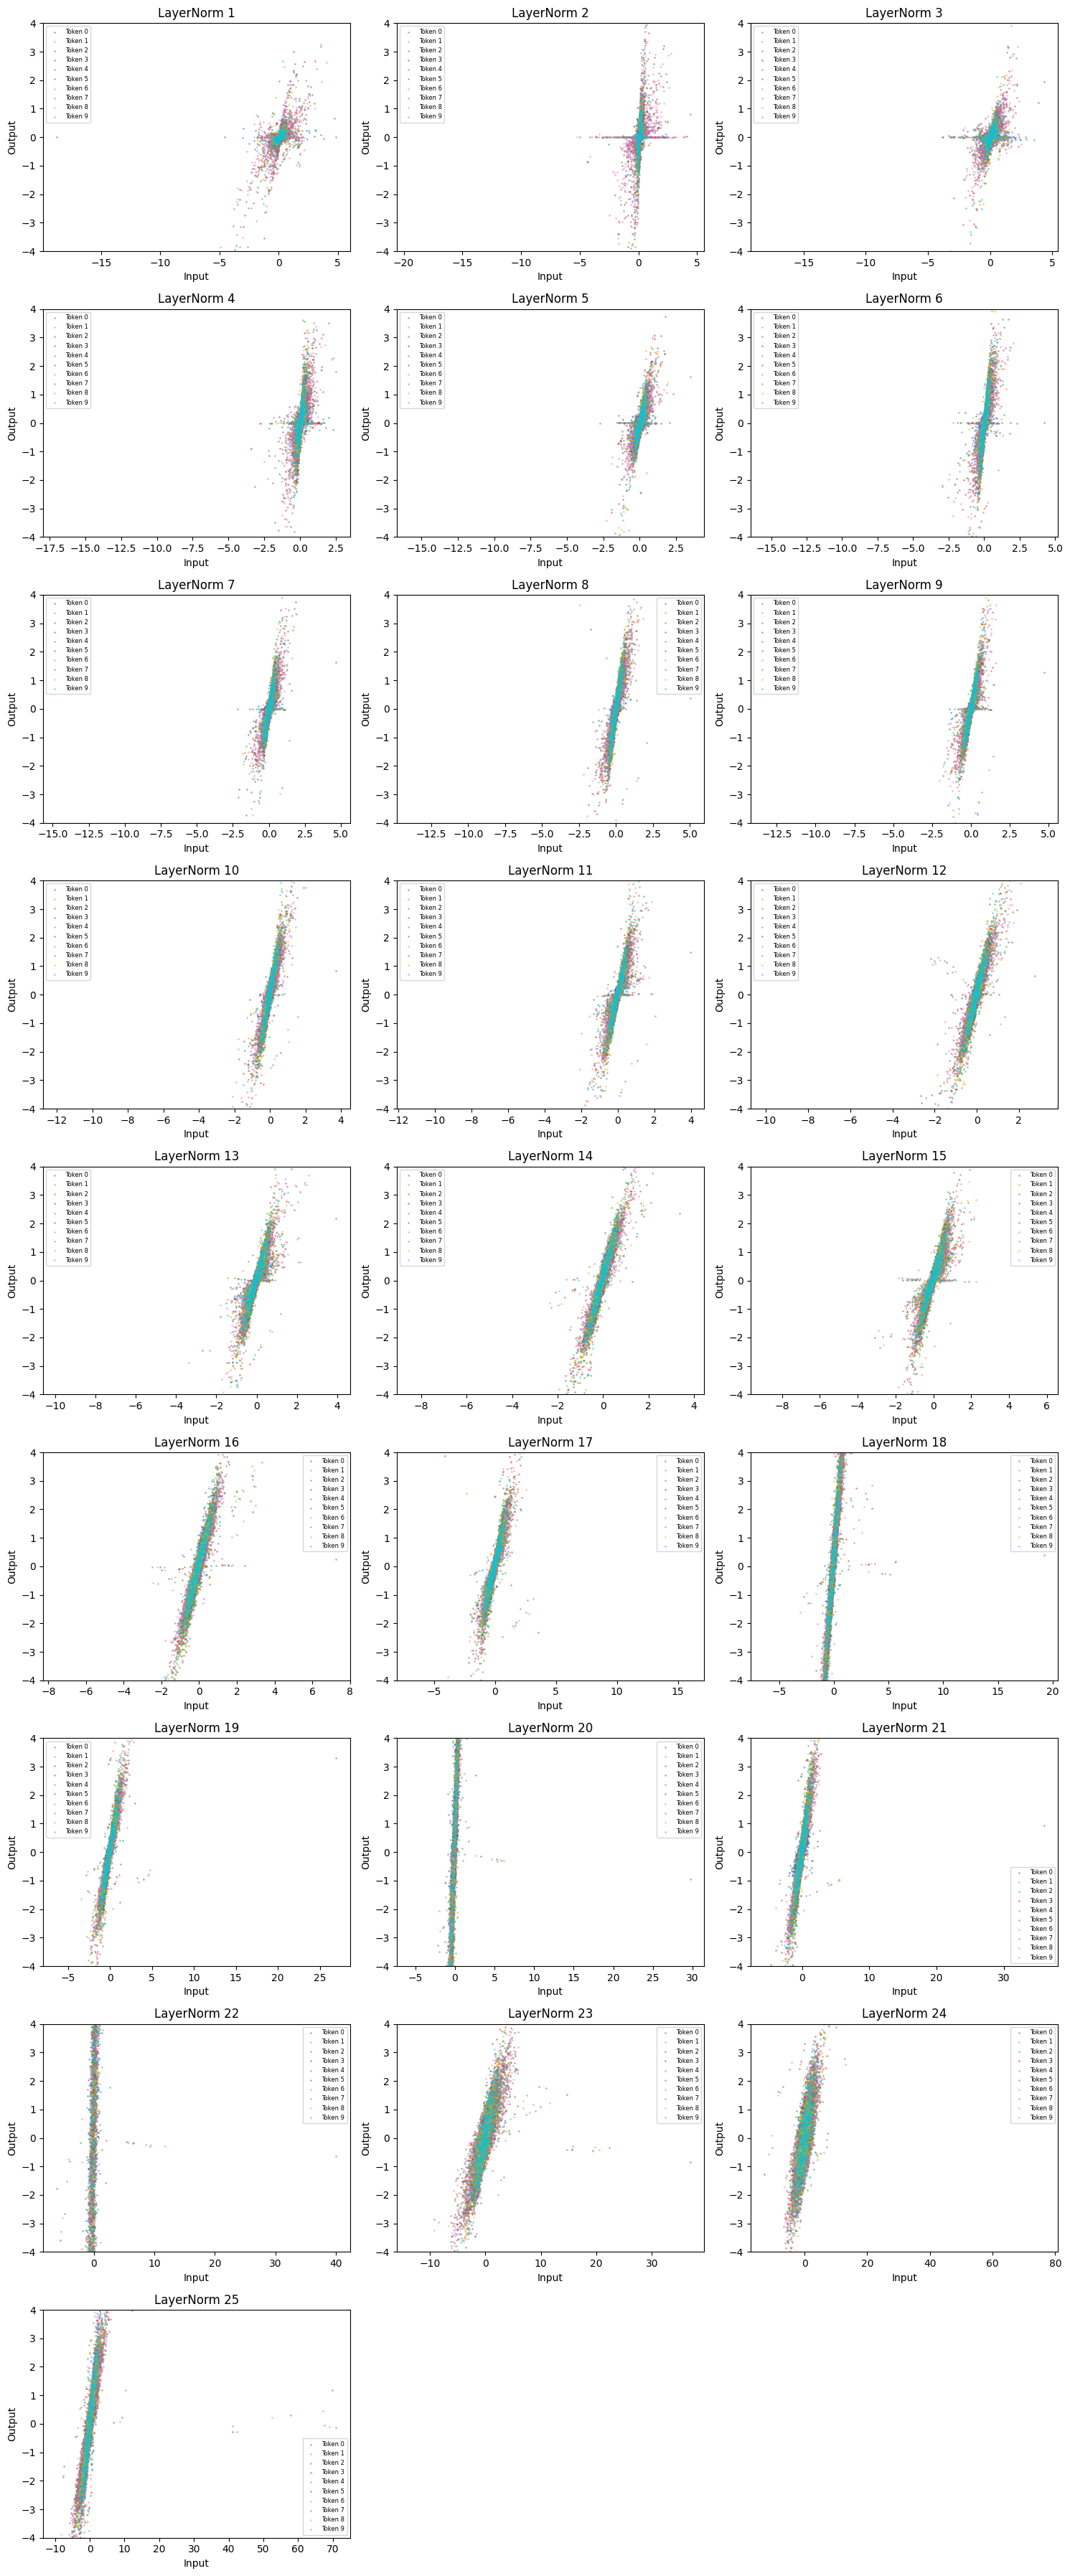

In [38]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math
import numpy as np
from datasets import load_dataset
import timm
from PIL import Image

# LayerNorm 입출력 저장 dict
ln_io_storage = {}

def ln_hook_fn(module, input, output):
    x = input[0].detach().cpu()
    y = output.detach().cpu()
    ln_io_storage[module] = {
        "input": x,
        "output": y
    }

def load_vit_with_ln_hooks():
    model = timm.create_model('vit_base_patch16_224', pretrained=True)
    model.eval()
    for module in model.modules():
        if isinstance(module, nn.LayerNorm):
            module.register_forward_hook(ln_hook_fn)
    return model

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# mini-ImageNet에서 한 장 로드
dataset = load_dataset("timm/mini-imagenet", split="validation[:1]")
img = dataset[0]['image'].convert("RGB")
img = transform(img).unsqueeze(0)  # (1, 3, 224, 224)

# 모델 로딩 및 forward
model = load_vit_with_ln_hooks()
with torch.no_grad():
    _ = model(img)

# 시각화
total_ln_layers = len(ln_io_storage)
cols = 3
rows = math.ceil(total_ln_layers / cols)
colors = plt.cm.get_cmap("tab10", 10)

plt.figure(figsize=(cols * 5, rows * 4))

for i, (layer, tensors) in enumerate(ln_io_storage.items()):
    x = tensors['input'][0]    # shape: (N, D)
    y = tensors['output'][0]   # shape: (N, D)
    N = x.shape[0]
    
    plt.subplot(rows, cols, i + 1)
    for n in range(min(N, 10)):  # 최대 10 토큰
        x_n = x[n].flatten().numpy()
        y_n = y[n].flatten().numpy()
        plt.scatter(x_n, y_n, s=1, alpha=0.4, color=colors(n), label=f"Token {n}")

    plt.ylim(-4, 4)  # ✅ Y축 제한
    plt.title(f"LayerNorm {i+1}")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend(fontsize=6)

plt.tight_layout()
plt.show()


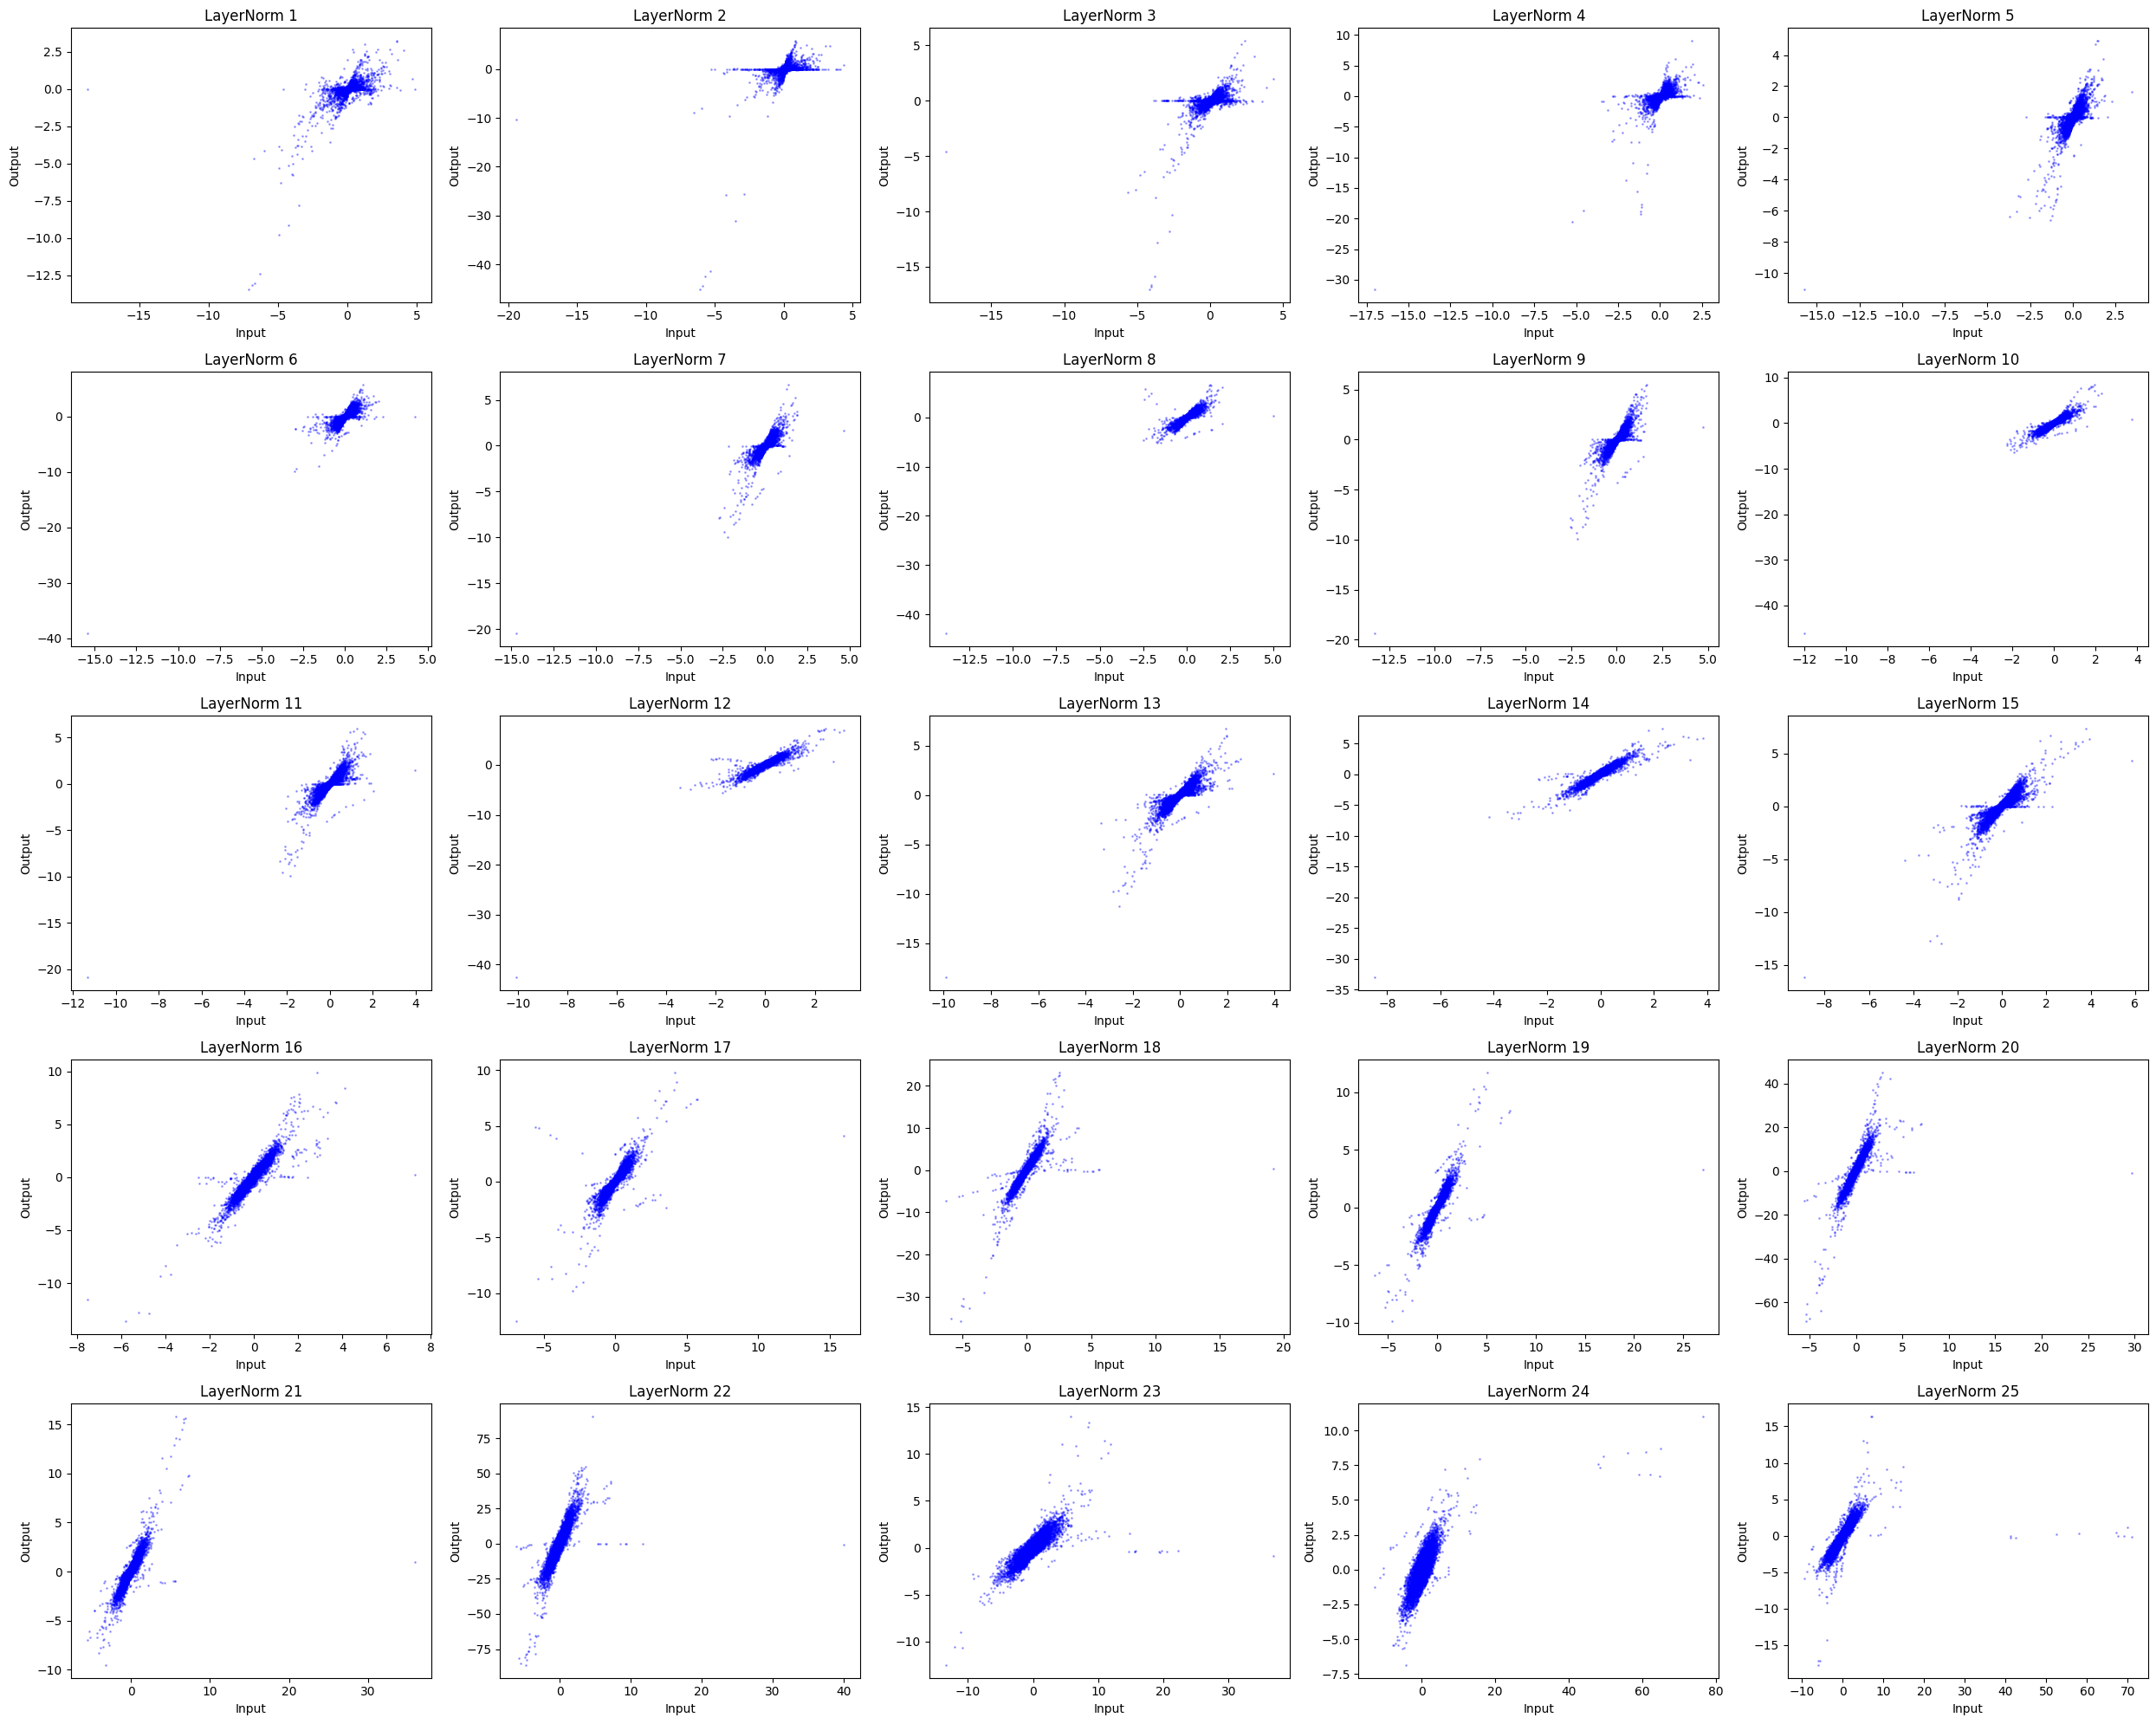

In [53]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math
import numpy as np
from datasets import load_dataset
import timm
from PIL import Image

# LayerNorm 입출력 저장 dict
ln_io_storage = {}

def ln_hook_fn(module, input, output):
    x = input[0].detach().cpu()
    y = output.detach().cpu()
    ln_io_storage[module] = {
        "input": x,
        "output": y
    }

def load_vit_with_ln_hooks():
    model = timm.create_model('vit_base_patch16_224', pretrained=True)
    model.eval()
    for module in model.modules():
        if isinstance(module, nn.LayerNorm):
            module.register_forward_hook(ln_hook_fn)
    return model

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# mini-ImageNet에서 한 장 로드
dataset = load_dataset("timm/mini-imagenet", split="validation[:50]")
img = dataset[0]['image'].convert("RGB")
img = transform(img).unsqueeze(0)  # (1, 3, 224, 224)

# 모델 로딩 및 forward
model = load_vit_with_ln_hooks()
with torch.no_grad():
    _ = model(img)

# 시각화
total_ln_layers = len(ln_io_storage)
cols = 5
rows = math.ceil(total_ln_layers / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, (layer, tensors) in enumerate(ln_io_storage.items()):
    x = tensors['input'][0]    # shape: (N, D)
    y = tensors['output'][0]   # shape: (N, D)
    N = x.shape[0]
    
    plt.subplot(rows, cols, i + 1)
    for n in range(min(N, 10)):  # 최대 10 토큰까지만 표시
        x_n = x[n].flatten().numpy()
        y_n = y[n].flatten().numpy()
        plt.scatter(x_n, y_n, s=1, alpha=0.3, color='blue')  # 모든 토큰 같은 색상

    # plt.xlim(-10, 10)
    # plt.ylim(-10, 10)
    plt.title(f"LayerNorm {i+1}")
    plt.xlabel("Input")
    plt.ylabel("Output")

plt.tight_layout()
plt.show()

